In [1]:
import pandas as pd
import numpy as ny
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (10,5)
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

In [2]:
df = pd.read_csv("car_features.csv")
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Columns: 16 entries, Make to MSRP
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


In [3]:
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [5]:
df.shape

(11914, 16)

In [6]:
df.groupby('Make')['Make'].agg('count')

Make
Acura             252
Alfa Romeo          5
Aston Martin       93
Audi              328
BMW               334
Bentley            74
Bugatti             3
Buick             196
Cadillac          397
Chevrolet        1123
Chrysler          187
Dodge             626
FIAT               62
Ferrari            69
Ford              881
GMC               515
Genesis             3
HUMMER             17
Honda             449
Hyundai           303
Infiniti          330
Kia               231
Lamborghini        52
Land Rover        143
Lexus             202
Lincoln           164
Lotus              29
Maserati           58
Maybach            16
Mazda             423
McLaren             5
Mercedes-Benz     353
Mitsubishi        213
Nissan            558
Oldsmobile        150
Plymouth           82
Pontiac           186
Porsche           136
Rolls-Royce        31
Saab              111
Scion              60
Spyker              3
Subaru            256
Suzuki            351
Tesla              18
Toyot

In [7]:
df1 = df.drop(['Engine Fuel Type','Number of Doors','Market Category','Vehicle Size','Vehicle Style','Popularity'],axis='columns')
df1.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [8]:
df2 = df1.rename(columns={"Engine HP":"HP",'Engine Cylinders':'Cylinders','Transmission Type':'Transmission','Driven_Wheels':'Drive mode','highway MPG':'MGP-H','city mpg':'MGP-C','MSRP':'Price'})
df2.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive mode,MGP-H,MGP-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [9]:
df2.isnull().sum()

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive mode       0
MGP-H            0
MGP-C            0
Price            0
dtype: int64

In [10]:
df3 = df2.dropna()
df3.isnull().sum()

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive mode      0
MGP-H           0
MGP-C           0
Price           0
dtype: int64

In [11]:
df3[df3.duplicated()].count()

Make            989
Model           989
Year            989
HP              989
Cylinders       989
Transmission    989
Drive mode      989
MGP-H           989
MGP-C           989
Price           989
dtype: int64

In [12]:
df3.shape

(11816, 10)

In [13]:
df4 = df3.drop_duplicates()
df4[df4.duplicated()].count()

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive mode      0
MGP-H           0
MGP-C           0
Price           0
dtype: int64

In [14]:
len(df4['Make'].unique())

47

In [15]:
trans = df4['Transmission']=='UNKNOWN'
trans

0        False
1        False
2        False
3        False
4        False
         ...  
11909    False
11910    False
11911    False
11912    False
11913    False
Name: Transmission, Length: 10827, dtype: bool

In [16]:
df4['Price'].describe().round(2)

count      10827.00
mean       42493.25
std        62294.51
min         2000.00
25%        21972.50
50%        30845.00
75%        43300.00
max      2065902.00
Name: Price, dtype: float64

In [17]:
df4.shape

(10827, 10)

<Axes: xlabel='Price'>

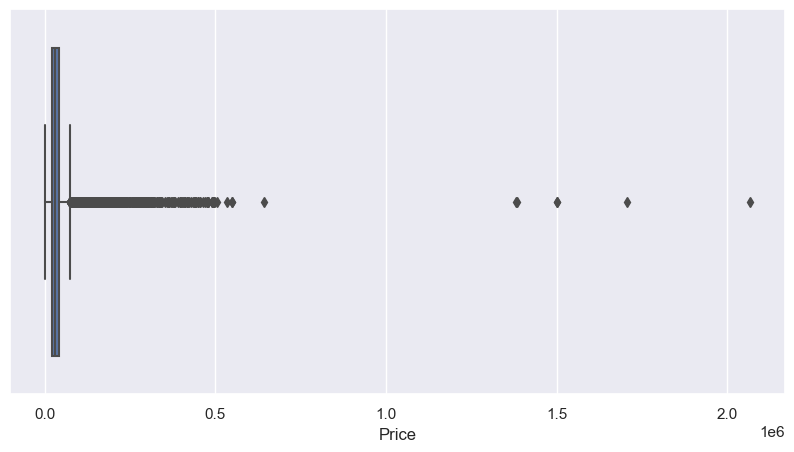

In [18]:
sns.boxplot(x=df4['Price'])

<Axes: xlabel='HP'>

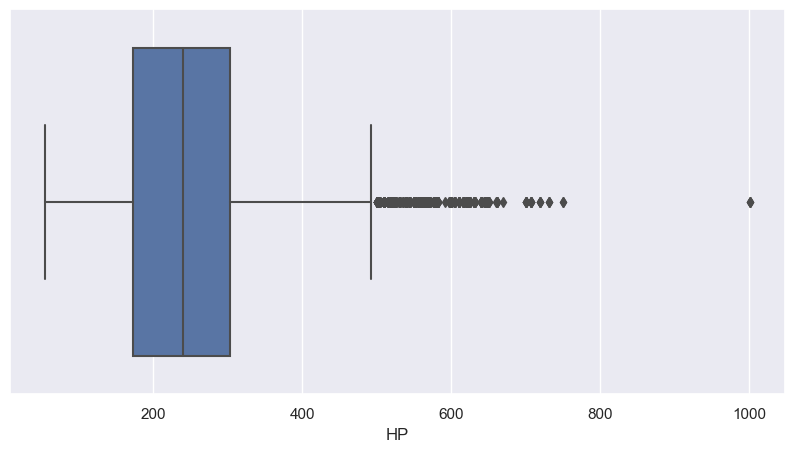

In [19]:
sns.boxplot(x=df4['HP'])

<Axes: xlabel='Cylinders'>

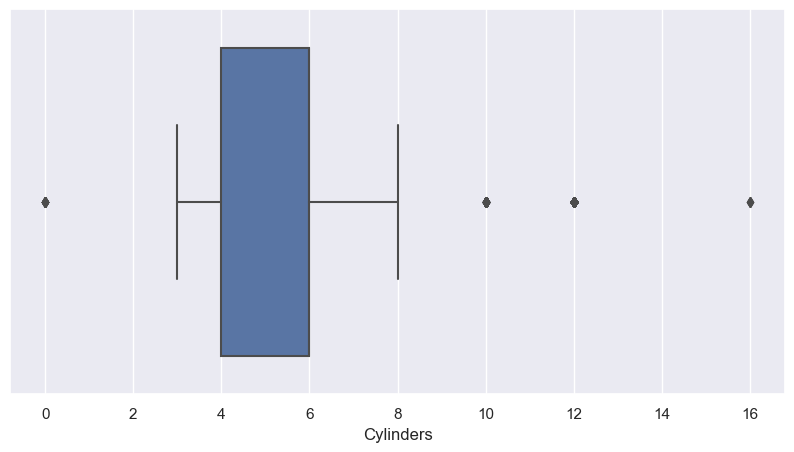

In [20]:
sns.boxplot(x=df4['Cylinders'])

In [21]:
Q1 = df4.quantile(0.25)
Q3 = df4.quantile(0.75)
IQR = Q3-Q1
IQR

/var/folders/fw/l_8k9vqd3cb336c9kyplyvxm0000gn/T/ipykernel_59116/4165729063.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df4.quantile(0.25)
/var/folders/fw/l_8k9vqd3cb336c9kyplyvxm0000gn/T/ipykernel_59116/4165729063.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df4.quantile(0.75)


Year             9.0
HP             130.0
Cylinders        2.0
MGP-H            8.0
MGP-C            6.0
Price        21327.5
dtype: float64

In [22]:
df4.shape

(10827, 10)

In [23]:
df5 = df4[~((df4 < (Q1 - 1.5 * IQR)) |(df4 > (Q3 + 1.5 * IQR))).any(axis=1)]
df5.shape

/var/folders/fw/l_8k9vqd3cb336c9kyplyvxm0000gn/T/ipykernel_59116/1138195576.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df5 = df4[~((df4 < (Q1 - 1.5 * IQR)) |(df4 > (Q3 + 1.5 * IQR))).any(axis=1)]


(9191, 10)

In [24]:
df6 = df5.drop(df5[df5['Transmission']=='UNKNOWN'].index,axis='index')

In [25]:
df6.shape

(9183, 10)

In [26]:
df6.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive mode,MGP-H,MGP-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [27]:
len(df6.Make.unique())

38

Text(0, 0.5, 'Number of cars')

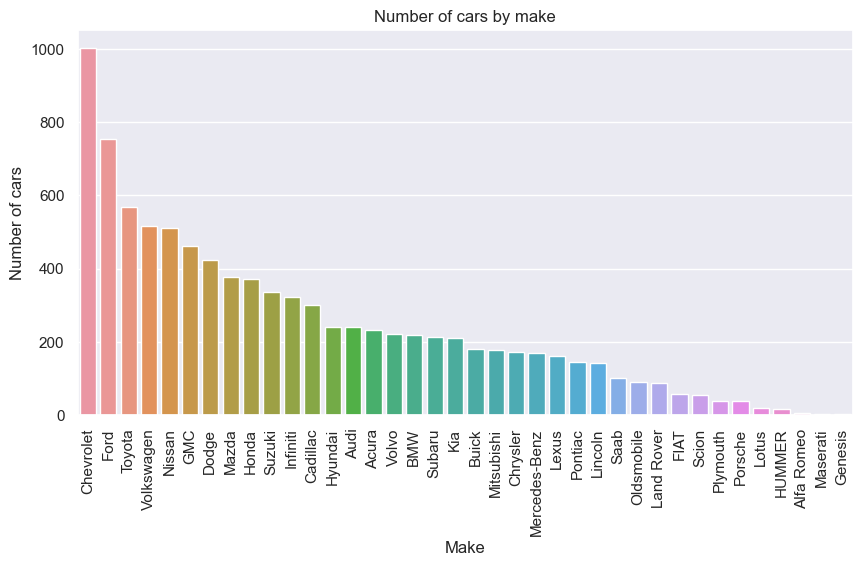

In [34]:
sns.countplot(x='Make',data = df6, order=df6['Make'].value_counts().index)
plt.title('Number of cars by make')
plt.xlabel('Make')
plt.xticks(rotation=90)
plt.ylabel('Number of cars')

<AxesSubplot:>

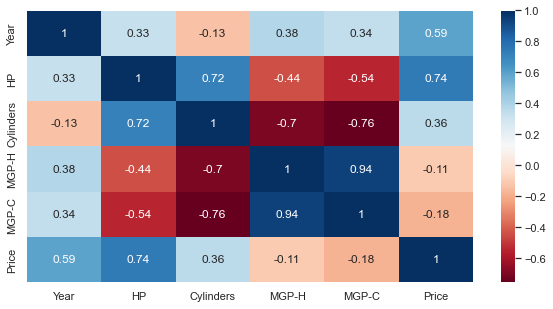

In [27]:
plt.figure(figsize=(10,5))
c = df6.corr()
sns.heatmap(c,cmap='RdBu',annot=True)

Text(0, 0.5, 'Price')

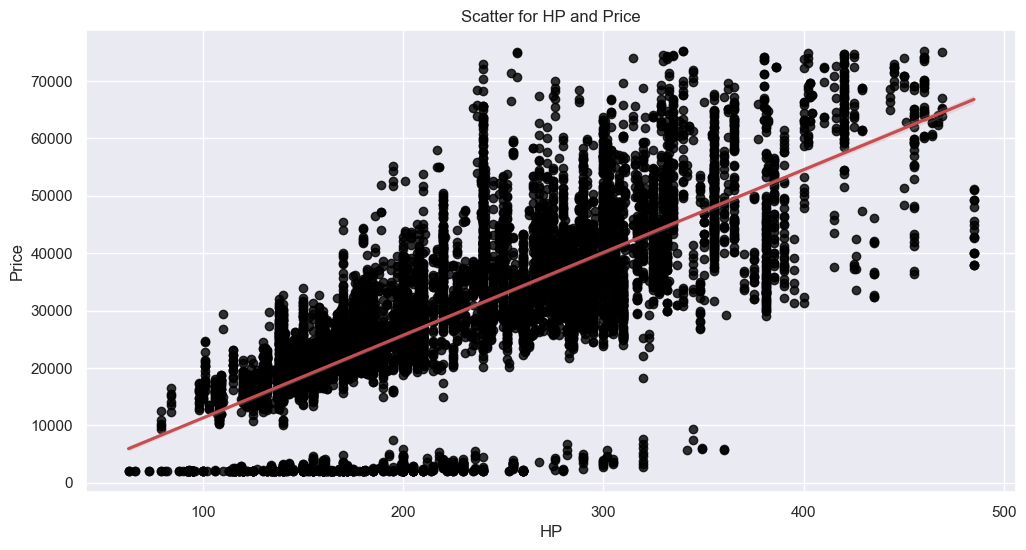

In [42]:
plt.figure(figsize=(12,6))
sns.regplot(x='HP', y='Price', data=df6, scatter_kws={'color':'black'}, line_kws={'color':'r'})
plt.title('Scatter for HP and Price')
plt.xlabel('HP')
plt.ylabel('Price')

Text(0, 0.5, 'MGP-H')

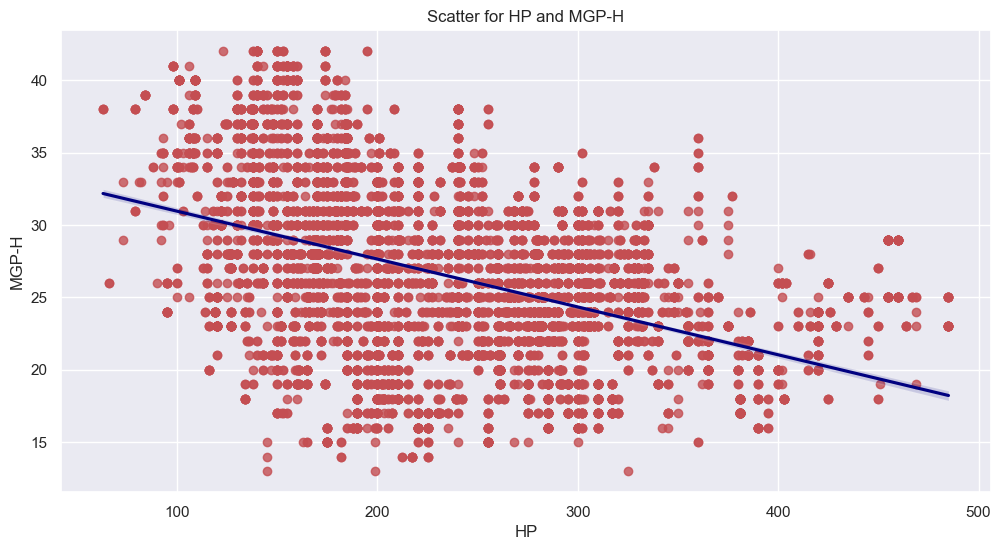

In [80]:
plt.figure(figsize=(12,6))
sns.regplot(x='HP',y='MGP-H',data=df6, scatter_kws={'color':'r'}, line_kws={'color':'navy'})
plt.title('Scatter for HP and MGP-H')
plt.xlabel('HP')
plt.ylabel('MGP-H')

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(df6['M'],df6['Price'])

In [43]:
df6.Cylinders.unique()

array([6., 4., 8., 5., 3.])

Text(0, 0.5, 'Count')

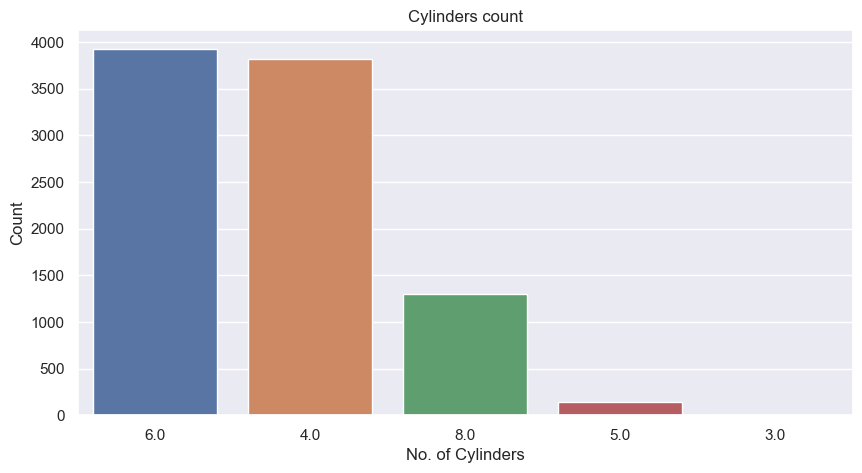

In [44]:
sns.countplot(x='Cylinders',data=df6, order=df6['Cylinders'].value_counts().index)
plt.title('Cylinders count')
plt.xlabel('No. of Cylinders')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

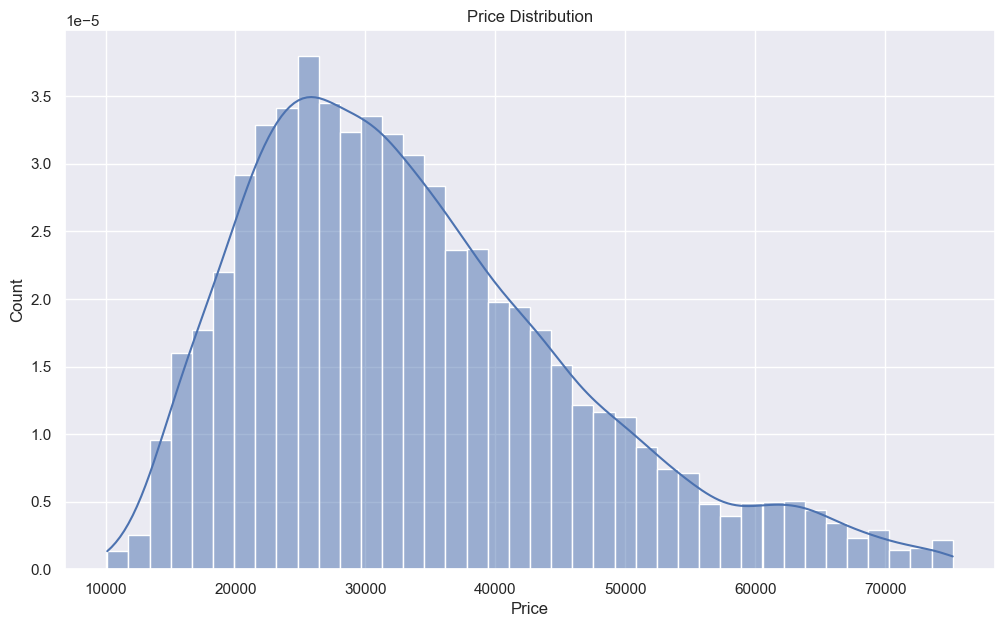

In [100]:
plt.figure(figsize=(12,7))
sns.histplot(df8['Price'], kde=True, stat="density", color='b')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')

In [98]:
df8 = df6[df6['Price'] > 10000]
df8

,Make,Model,Year,HP,Cylinders,Transmission,Drive mode,MGP-H,MGP-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50920


In [68]:
df6['Price'].describe()

count     9183.000000
mean     30999.563868
std      14977.915467
min       2000.000000
25%      22102.500000
50%      29995.000000
75%      39750.000000
max      75200.000000
Name: Price, dtype: float64

In [33]:
df6.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive mode,MGP-H,MGP-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [34]:
round(df6.describe(),2)

,Year,HP,Cylinders,MGP-H,MGP-C,Price
count,9183.00,9183.00,9183.00,9183.00,9183.00,9183.00
mean,2011.34,236.74,5.44,26.44,19.26,30999.56
std,6.27,76.83,1.39,5.72,4.37,14977.92
min,1994.00,63.00,3.00,13.00,10.00,2000.00
25%,2008.00,175.00,4.00,22.00,16.00,22102.50
50%,2015.00,230.00,6.00,26.00,18.00,29995.00
75%,2016.00,290.00,6.00,30.00,22.00,39750.00
max,2017.00,485.00,8.00,42.00,31.00,75200.00


In [35]:
df6['Transmission'].value_counts()

AUTOMATIC           6834
MANUAL              2030
AUTOMATED_MANUAL     319
Name: Transmission, dtype: int64

In [58]:
df6['Transmission'].value_counts().sum()

9183

In [60]:
automatic = round((6834/9183)*100,2)
manual = round((2030/9183)*100,2)
auto_manual = round((319/9183)*100,2)
print(automatic)
print(manual)
print(auto_manual)

74.42
22.11
3.47


Text(0, 0.5, 'Types')

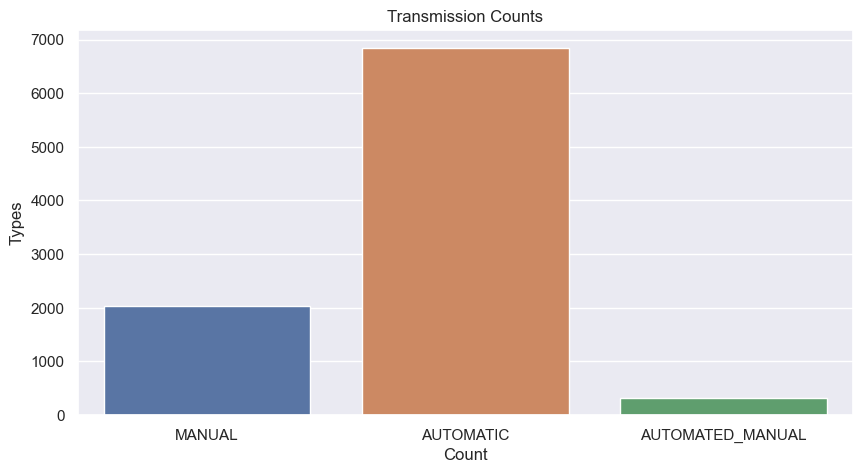

In [74]:
sns.countplot(x='Transmission',data=df6)
plt.title('Transmission Counts')
plt.xlabel('Count')
plt.ylabel('Types')

In [110]:
df9 = df6[['Make','HP','Transmission','MGP-H','MGP-C','Price']]

In [104]:
df6.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive mode,MGP-H,MGP-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


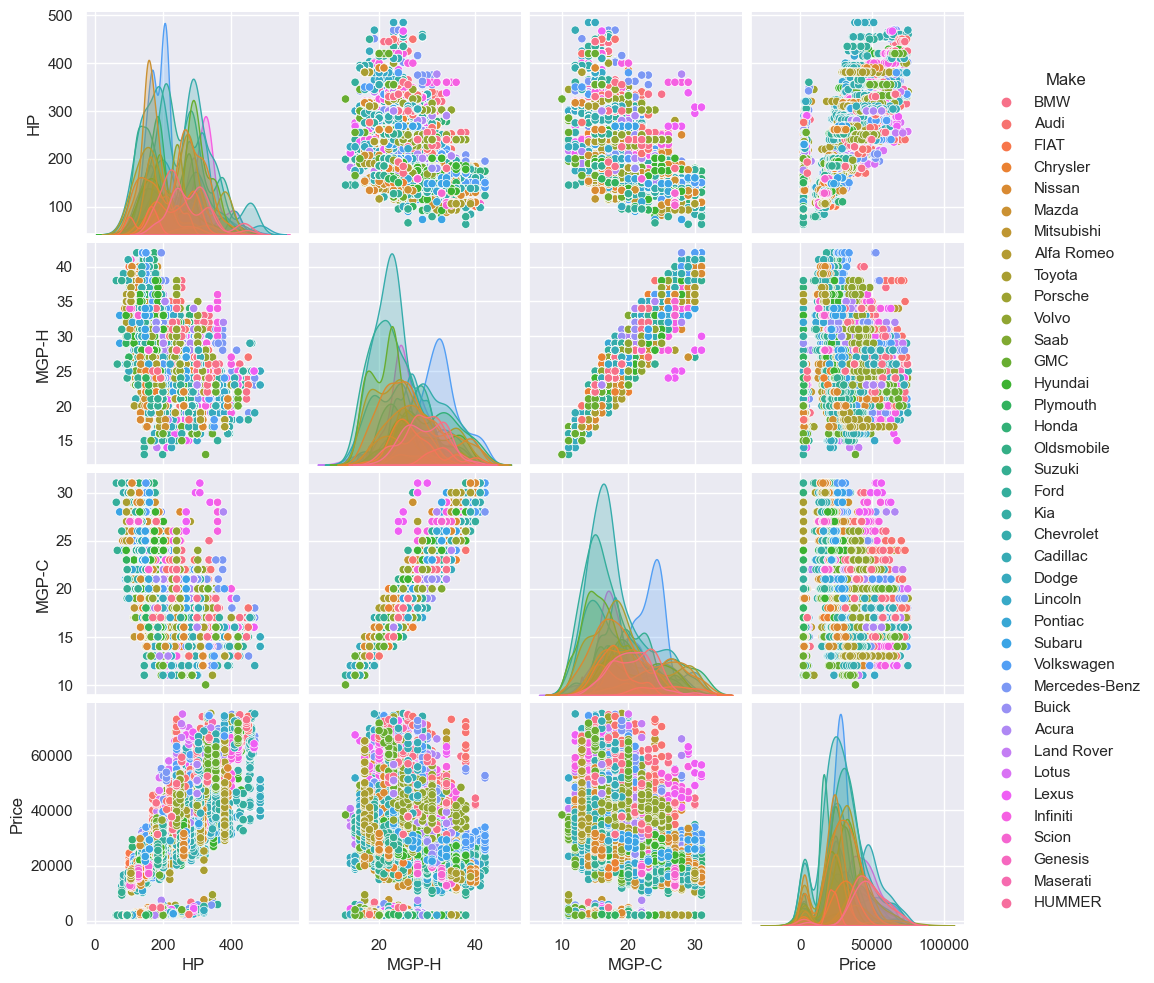

In [111]:
sns.pairplot(df9,hue="Make")